In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import spline

## The Top 10 Words for Each Topic

In [2]:
topic_words = pd.read_csv("topic_words.csv", index_col=0)
topic_words

,word 1,word 2,word 3,word 4,word 5,word 6,word 7,word 8,word 9,word 10
topic_id,,,,,,,,,,
0,american,states,officials,united,military,would,obama,administration,intelligence,official
1,court,news,case,prison,family,media,two,charges,video,authorities
2,israel,israeli,palestinian,netanyahu,palestinians,jerusalem,bank,west,jewish,israelis
3,killed,attack,military,attacks,security,people,two,forces,soldiers,officials
4,saudi,arabia,yemen,arab,yemeni,united,coalition,country,qaeda,led
5,obama,would,kerry,trump,president,united,states,american,administration,deal
6,hezbollah,syria,lebanon,lebanese,syrian,jordan,refugees,war,border,shiite
7,iran,iranian,nuclear,sanctions,united,tehran,states,would,irans,program
8,protesters,police,protests,people,security,government,forces,friday,activists,violence


## The Topic Weight Graphs across 2011 - 2018

In [3]:
month_topics = pd.read_csv("month_topics.csv")

### Split the date by topic categories

In [4]:
topic0 = month_topics[month_topics["topic_id"]==0]
topic1 = month_topics[month_topics["topic_id"]==1]
topic2 = month_topics[month_topics["topic_id"]==2]
topic3 = month_topics[month_topics["topic_id"]==3]
topic4 = month_topics[month_topics["topic_id"]==4]
topic5 = month_topics[month_topics["topic_id"]==5]
topic6 = month_topics[month_topics["topic_id"]==6]
topic7 = month_topics[month_topics["topic_id"]==7]
topic8 = month_topics[month_topics["topic_id"]==8]
topic9 = month_topics[month_topics["topic_id"]==9]
topic10 = month_topics[month_topics["topic_id"]==10]
topic11 = month_topics[month_topics["topic_id"]==11]
topic12 = month_topics[month_topics["topic_id"]==12]
topic13 = month_topics[month_topics["topic_id"]==13]
topic14 = month_topics[month_topics["topic_id"]==14]
topic15 = month_topics[month_topics["topic_id"]==15]
topic16 = month_topics[month_topics["topic_id"]==16]
topic17 = month_topics[month_topics["topic_id"]==17]
topic18 = month_topics[month_topics["topic_id"]==18]
topic19 = month_topics[month_topics["topic_id"]==19]

### Smoothe the data

In [5]:
num_month = 8 * 12
x = list(range(num_month))
x_new = np.linspace(0, num_month, num_month * 30)

def smooth(y):
    y_new = spline(x, y, x_new)
    return y_new

y0 = smooth(topic0.topic_weight.values)
y1 = smooth(topic1.topic_weight.values)
y2 = smooth(topic2.topic_weight.values)
y3 = smooth(topic3.topic_weight.values)
y4 = smooth(topic4.topic_weight.values)
y5 = smooth(topic5.topic_weight.values)
y6 = smooth(topic6.topic_weight.values)
y7 = smooth(topic7.topic_weight.values)
y8 = smooth(topic8.topic_weight.values)
y9 = smooth(topic9.topic_weight.values)
y10 = smooth(topic10.topic_weight.values)
y11 = smooth(topic11.topic_weight.values)
y12 = smooth(topic12.topic_weight.values)
y13 = smooth(topic13.topic_weight.values)
y14 = smooth(topic14.topic_weight.values)
y15 = smooth(topic15.topic_weight.values)
y16 = smooth(topic16.topic_weight.values)
y17 = smooth(topic17.topic_weight.values)
y18 = smooth(topic18.topic_weight.values)
y19 = smooth(topic19.topic_weight.values)

C:\Users\yangw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


## Plot the topic weights by month for each topic

In [6]:
def plot_graph(*ylist):
    fig, ax = plt.subplots(figsize=(16,8))
    for i, y in enumerate(ylist):
        ax.plot(x_new, y) 
    ax.grid()
    return ax

### Topics Nations

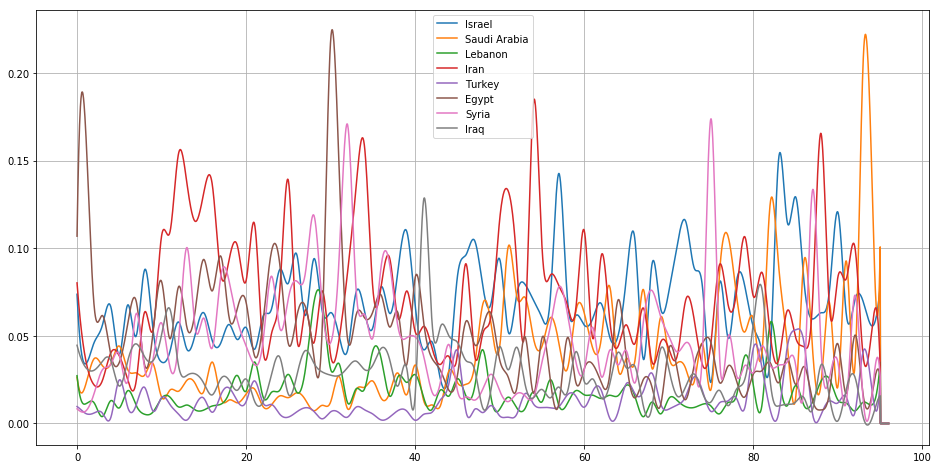

In [7]:
ax = plot_graph(y2, y4, y6, y7, y9, y10, y13, y19)
ax.legend(["Israel","Saudi Arabia","Lebanon","Iran","Turkey","Egypt","Syria","Iraq"])

### Topic ISIS

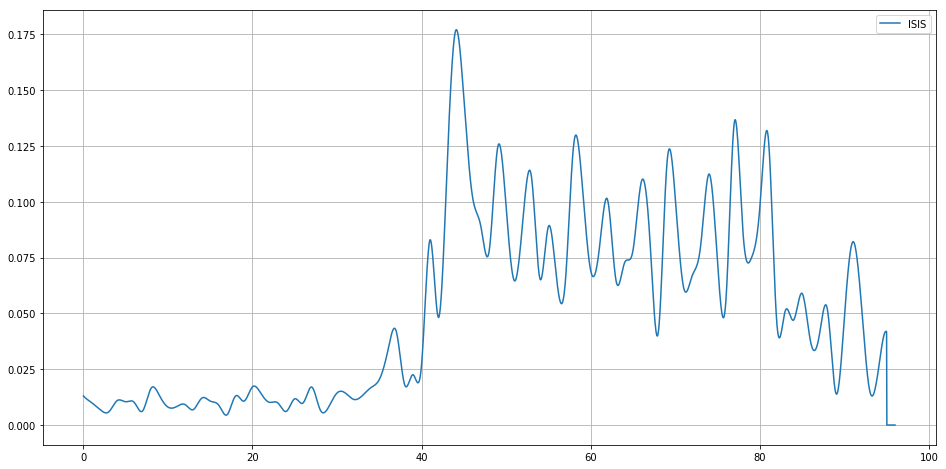

In [8]:
ax = plot_graph(y11)
ax.legend(["ISIS"])

### Topics Issues

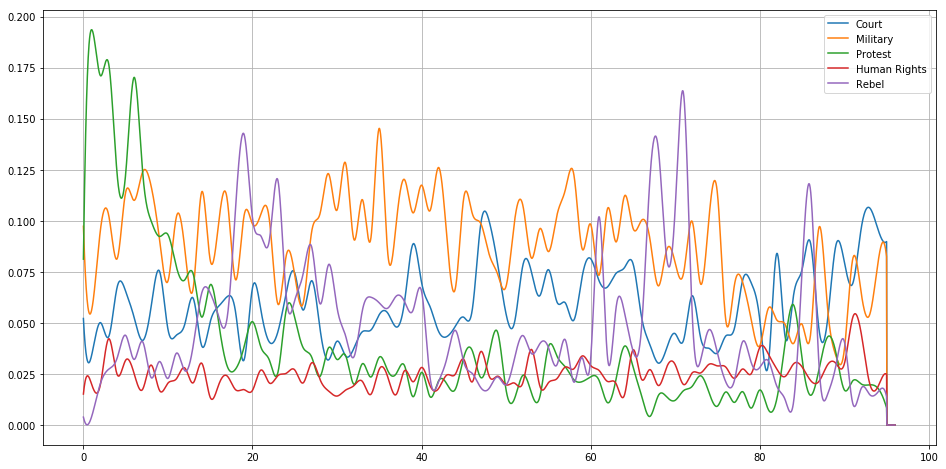

In [9]:
ax = plot_graph(y1, y3, y8, y12, y16)
ax.legend(["Court", "Military", "Protest", "Human Rights", "Rebel"])

### Topics American

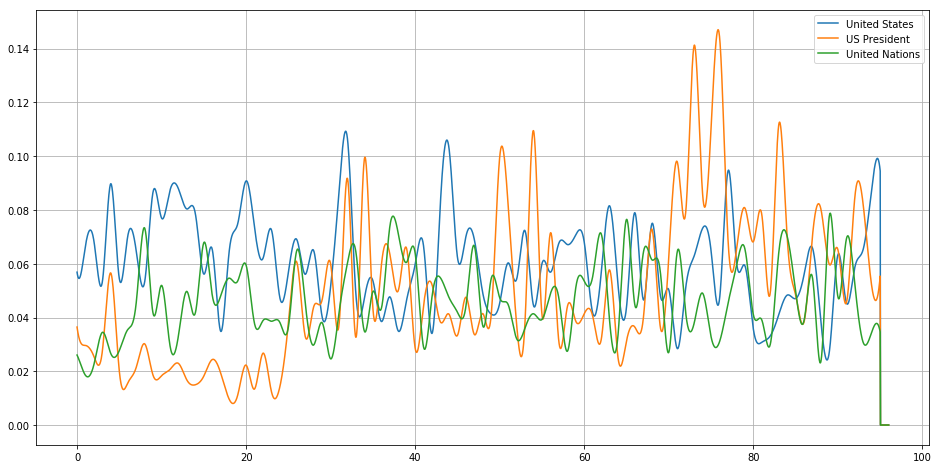

In [10]:
ax = plot_graph(y0, y5, y14)
ax.legend(["United States", "US President", "United Nations"])